In [1]:
#Aşağıda kullandığımız veri seti farklı alanlara verilen reklamlar ve bu reklamlara yapılan harcamalara göre satış sayılarını gösterir.

In [2]:
import pandas as pd
veriler = pd.read_csv("Reklamlar veri seti.csv")
#Not:Veri seti isminden sonra usecols = [kullanılacak sütunlar] ifadesi ile indexi değişken gibi algılaması engellenebilir veya istenilen değişkenler seçilebilir
df = veriler.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df = df.iloc[:,1:len(df)]
#Dışarıdan alınan veri setinden gelen indexlerden oluşan değişkeni yok etmek için

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [7]:
df.isnull().values.any()
#eksik gözlem olup olmadığını kontrol etmek için

False

In [8]:
df.corr()
#Değişkenleri birbirlerine göre korelasyonlarını(ilişkilerini) verir
#Aşağıdaki sonuçlara göre satışlara en çok etki eden reklam yeri televizyon olmaktadır.
#Ayrıca televizyon ile radio arasında çok fazla korelasyon olmadığı ve radio ile satışlar arasındaki ilişki yüksek olduğu için satışların başka bir kısmını da radio değikeni açıklıyordur.

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


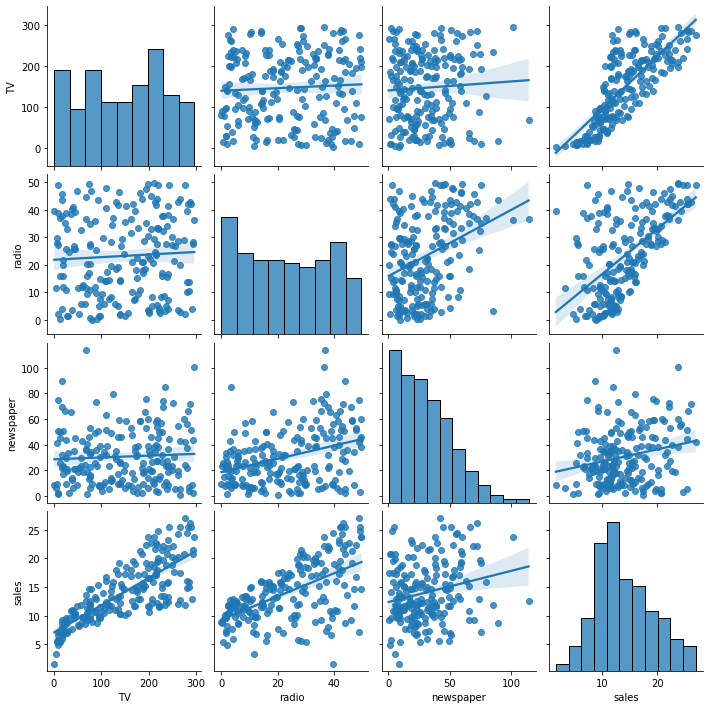

In [9]:
import seaborn as sns
sns.pairplot(df,kind = "reg")
#değişkenlerin kendi içindeki dağılımlarını ve diğer değişkenlerle ilişkilerini görmek için çizdirilen grafik

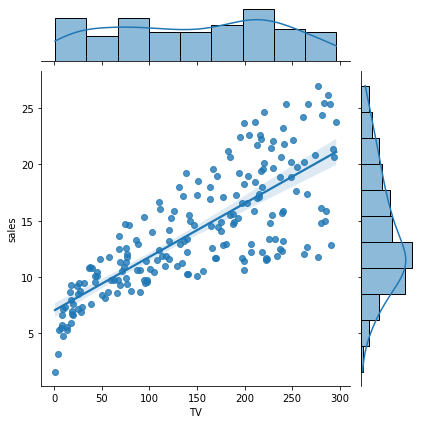

In [10]:
sns.jointplot(x= "TV",y= "sales", data = df,kind = "reg")
#TV ve sales değişkenleri arasındaki ilişkiye odaklanmak için kullanılan değişken
#Bu grafikleri inceleyerek değişken hakkında dağılımları hakkında ve birbirleriyle ilişkileri hakkında bilgi sahibi olmamız gerekir.
#İleride bu ilişkilere göre işlem yapmamız gerekiyor.
#Değişkenlerin kendi içlerinde dengeli bir dağılımı olup olmadığı ortalaması ile medyanı arasında fark çok değilse dengelidir.
#Ayrıca grafiği 1 tepeli grafik veya ona yakınsa dengelidir.Tepesi olmayan veya çok tepeli grafikler dengeli bir dağılımı ifade etmez.

# Model Oluşturma

In [11]:
#basit doğrusal regresyonda tek değişkenli modellemeler yapılır.

In [12]:
import statsmodels.api as sm
x = df[["TV"]]#bağımsız değişkeni aldık.
x[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [13]:
x = sm.add_constant(x)
#matris işlemlerinin yapılabilmesi ve b0 sabit katsayısının bulunabilmesi için bir değeri eklenmesi için yapılıyor

C:\Users\isaad\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [14]:
x[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [15]:
y = df["sales"]#bağımlı değişkeni aldık.
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [16]:
lm = sm.OLS(y,x)
#model kurma işlemini gerçekleştirdik

In [17]:
model = lm.fit()
#modelimizi fit ettik yani uyguladık

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           1.47e-42
Time:                        19:52:30   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
"""oluşturduğumuz modelin çıktılarına göre:
R-squared(R kare) değeri bize bağımlı değişkenin bağımsız değişkeni ifade etme oranını verir.
Aşağıdaki değer 0.612 olduğuna göre ifade gücü yüksek bir modeldir.
Adj.R-squared(Düzeltilmiş R-kare) değeri çok fazla değişken bir arada olduğunda konudan bağımsız 
değişkenlerin gelişine göre daha az değiştiği için ifade etme gücünü daha iyi bize gösterir.
F-statistic değeri ise modelin anlamlılığını ifade eder.
Prob(F-statistic) değeri ise modelin anlamlılığının p value değeridir
Bu iki değere göre model anlamlıdır."""
"""const değerinin coef değeri tahmin modelindeki b0 değerini,
TV değişkenindeki coef değeri ise tahmin modelindeki b1 değerini ifade etmektedir.
Ayrıca bu katsayıların yanında std err değişkeni bu değişkenlerin standart hatalarını göstermektedir.
Bu katsayıların ve hataların anlamlı olup olmadığını anlamak için de t istatistiği değeri ve
t istatistiğinin p value değeri verilmiştir.p value değeri 0,05'in altında olduğu için bu katsayıların anlamlı olduğu
sonucuna ulaşılabilir.
Onların yanındaki iki değer ise bu katsayıların %95 oranında hangi aralıkta olduğunu göstermektedir.
Yani güven aralığını vermektedir.
Yani örneğin Tv değişkeninin katsayısı olacak olan b1'in 0,0475 değeri anlamlı bir değerdir
ve %95 doğrulukla 0.042 ile 0.053 aralığındadır."""

"const değerinin coef değeri tahmin modelindeki b0 değerini,\nTV değişkenindeki coef değeri ise tahmin modelindeki b1 değerini ifade etmektedir.\nAyrıca bu katsayıların yanında std err değişkeni bu değişkenlerin standart hatalarını göstermektedir.\nBu katsayıların ve hataların anlamlı olup olmadığını anlamak için de t istatistiği değeri ve\nt istatistiğinin p value değeri verilmiştir.p value değeri 0,05'in altında olduğu için bu katsayıların anlamlı olduğu\nsonucuna ulaşılabilir.\nOnların yanındaki iki değer ise bu katsayıların %95 oranında hangi aralıkta olduğunu göstermektedir.\nYani güven aralığını vermektedir.\nYani örneğin Tv değişkeninin katsayısı olacak olan b1'in 0,0475 değeri anlamlı bir değerdir\nve %95 doğrulukla 0.042 ile 0.053 aralığındadır."

## Farklı bir model kurma yöntemi

In [20]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           1.47e-42
Time:                        19:52:31   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model.params
#modelden aldığımız katsayıları gösteren fonksiyon

Intercept    7.032594
TV           0.047537
dtype: float64

In [22]:
model.summary().tables[1]
#tablodaki katsayılarla ilgili değerleri yani 1 numaralı tabloyu(yani ikinciyi) aldık.

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [23]:
model.conf_int()
#katsayıların sadece güven aralığını çekmek için kullanılan fonksiyon

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [24]:
model.f_pvalue
#modelin anlamlılığına ilişkin p-value değerini aldık

1.4673897001947095e-42

In [25]:
print("f_pvalue: ","%.4f" % model.f_pvalue)
#pvalue değerinin ilk 4 vb. sayısını almak için kullanılır.

f_pvalue:  0.0000


In [26]:
print("fvalue: ","%.4f" % model.fvalue)
#modelin f istatistiği değeri ve o değerin ilk 4 vb. sayısını aldık.

fvalue:  312.1450


In [27]:
print("tvalue: ","%.4f" % model.tvalues[0:1])
#b0 katsayısıın t istatistiği değerinin ilk 4 sayısını aldık.

tvalue:  15.3603


In [28]:
model.tvalues
#modeldeki katsayıların t istatistiği değerlerini almak için kullanılır.

Intercept    15.360275
TV           17.667626
dtype: float64

In [29]:
model.mse_model
#hata kareler ortalaması değerine erişmek için.Buna göre modelimiz iyi bir model olmamıştır.Hata çok fazladır.

3314.6181668686486

In [30]:
model.rsquared
#r kare değerine eriştik.Buna göre açıklanabilirlik oranı gerçek hayat için uygundur.

0.611875050850071

In [31]:
model.rsquared_adj
#düzeltilmiş r kare değerine eriştik.

0.6099148238341623

In [32]:
model.fittedvalues[0:5]
#ilk beş bağımsız değişkene model uygulanarak bulunan bağımlı değişken değerleridir.

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [33]:
y[0:5]
#gerçekteki bağımlı değişkenlerin ilk 5 değeridir.

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [34]:
print("Sales = " + str("%.3f" % model.params[0])+"+ TV*"+str("%.3f" % model.params[1]))
#basit doğrusal regresyonda kurduğumuz modelin matematiksel modelini bulduk.

Sales = 7.033+ TV*0.048


In [35]:
model_denklemi = "Sales = " + str("%.3f" % model.params[0])+"+ TV*"+str("%.3f" % model.params[1])

In [36]:
import matplotlib.pyplot as plt

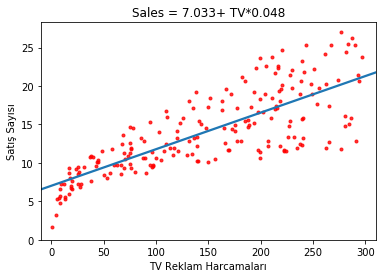

In [37]:
g = sns.regplot(df["TV"],df["sales"],ci = None,scatter_kws={'color':'r','s':9})
g.set_title(model_denklemi)
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Reklam Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom = 0);
#modelin görsel ifadesi

## Sklearn ile basit doğrusal regresyon modeli kurma

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
x = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(x,y)
model.intercept_#modelin b0 değeri
model.coef_#modelin b1 değeri

array([0.04753664])

In [40]:
model.score(x,y)
#Bu başarı oranı değildir.r kare değeridir.

0.611875050850071

In [41]:
model.predict(x)[0:5]
#model tarafından tahmin edilen değerleri gösterir.

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814])

Tahmin

In [47]:
#Örnek:30 birim TV harcaması olduğunda satışların tahmini değeri ne olur?
7.033+30*0.048#direk matematiksel modeli kullanarak

8.473

In [48]:
model.predict([[30]])
#predict değeri verdiğimiz sayıyı model denkleminde yerine koyar ve tahmini değeri gösterir.

array([8.45869276])

In [49]:
yeni_veri = [[5],[90],[200]]
model.predict(yeni_veri)
#bu şekilde elimizdeki listedeki bütün değerler için tahmini değerleri aldık.

array([ 7.27027675, 11.31089119, 16.53992164])

# Artıklar ve Makine Öğrenmesindeki Önemi

In [52]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()

In [50]:
from sklearn.metrics import mean_squared_error,r2_score

In [53]:
mse = mean_squared_error(y,model.fittedvalues)
#ilk yazdığımız değerler gerçek değerler ikinci değerler ise modelin tahmin ettiği değerlerdir
#bu fonksiyon ile bu modelin hata kareler ortalaması değerini buluyoruz.

In [54]:
mse

10.512652915656757

In [55]:
import numpy as np
rmse = np.sqrt(mse)

In [56]:
rmse

3.2423221486546887

In [57]:
reg.predict(x)[0:10]
#sklearn ile oluşturduğumuz modelden elde ettiğimiz tahmin değerleri
#bu işlemi model değişkeni üzerinden değil de reg değişkeni üzerinden yapabilmemizin nedeni reg değişkeninin bir nesne olması ve biz model değişkenine reg ile atama yaparken aslında reg nesnesini değiştirmiş olmamızdır.

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [58]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [60]:
k_t = pd.DataFrame({"gerçek_y": y[0:10],
                   "tahmin_y": reg.predict(x)[0:10]})

In [61]:
k_t

,gerçek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [62]:
k_t["hata"] = k_t["gerçek_y"]-k_t["tahmin_y"]
#gerçek değerlerden tahmini değerleri çıkararak her değişken için hata değerini bulduk

In [63]:
k_t

,gerçek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [64]:
k_t["hata_kare"] = k_t["hata"]**2

In [65]:
k_t

,gerçek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [66]:
np.sum(k_t["hata_kare"])#hata kareler toplamına eriştik

92.90350329638102

In [67]:
np.mean(k_t["hata_kare"])#hata kareler ortalamasına eriştik

9.290350329638102

In [68]:
np.sqrt(np.mean(k_t["hata_kare"]))#hata kareler ortalamasının kareköküne eriştik
#başta - leri götürmek için kare almıştık onu tekrar indirgemek için karekök aldık

3.048007599996775

In [69]:
model.resid[0:10]
#artıkları yani hata değerlerini aldık.

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

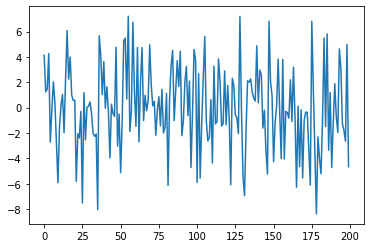

In [71]:
plt.plot(model.resid);
#artıkları görselleştirerek hangi değerlerde daha fazla hata yapıldığı anlaşılır.
#bu anlaşılma ile o hata yapılan değerlere odaklanılır ve orada modelin neden çok fazla hata yaptığı anlaşılmalıdır.
#yani sadece hata kareleri toplam-ortalaması vb. bakmak doğru olmayabilir.Böyle grafiklerle görselleştirilerek nerde neden fazla hata yapıldığı anlaşılmalıdır.